Importing **Torch** and **CIFAR10** dataset

In [105]:
import torch 
from torchvision.datasets import CIFAR10

Spliting the dataset into **train** and **test** sets

In [106]:
train_data = CIFAR10(root = 'data', train = True, download= True) 
test_data = CIFAR10(root = 'data', train = False, download= True)

Files already downloaded and verified
Files already downloaded and verified


**Checking** the dataset length

In [107]:
len(train_data) # has 50000 data in train set
len(test_data) # has 10000 data in test set
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data
    Split: Train

Show the dataset **image** and **label**

<class 'int'>


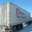

(32, 32)

In [108]:
im, gt = train_data[15]
print(type(gt)) # get gt type which is int
display(im)
im.size # can get the size 32 X 32


(-0.5, 31.5, 31.5, -0.5)

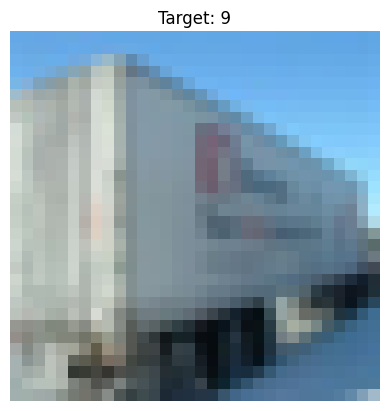

In [109]:
from matplotlib import pyplot as plt # import matplotlib

plt.imshow(im) # get image
plt.title(f'Target: {gt}') # get label 
plt.axis('off') # off x and y axises 

# Appyling **Augmentations**

In [110]:
from torchvision import transforms as T

def applying_T(root):
  
  """This function get saved dataset and apply some transformations to my data"""
  
  # applying a few transformations to TRAIN dataset

  train_data_T = T.Compose([
      T.RandomVerticalFlip(), # Flip Vertically
      T.ToTensor(), # change to Tensor values # (H, W, img_chan.)
      T.RandomHorizontalFlip(), # Flip Horizontally
      T.Normalize(mean = 0.5, std = 0.5)
  ])

  # applying a few transformations to TEST dataset

  test_data_T = T.Compose([
      T.RandomHorizontalFlip(), # Flip Horizontally
      T.ToTensor(), # change to Tensor values # (H, W, img_chan.)
      T.Normalize(mean = 0.5, std = 0.5)
  ])

  train_data = CIFAR10(root = root, train = True, transform = train_data_T, download = True)
  test_data = CIFAR10(root = root, train = False, transform = test_data_T, download = True)

  return train_data, test_data

after_T, test_data = applying_T("data") # train dataset is renamed



Files already downloaded and verified
Files already downloaded and verified


In [111]:
im, gt = after_T [0] # getting the 0 index of my train set element and change it to tensor
torch.unique(im) 

tensor([-1.0000, -0.9686, -0.9608, -0.9451, -0.9373, -0.9294, -0.9216, -0.9137,
        -0.9059, -0.8980, -0.8902, -0.8824, -0.8745, -0.8667, -0.8588, -0.8510,
        -0.8431, -0.8353, -0.8275, -0.8196, -0.8118, -0.8039, -0.7961, -0.7882,
        -0.7804, -0.7725, -0.7647, -0.7569, -0.7490, -0.7412, -0.7333, -0.7255,
        -0.7176, -0.7098, -0.7020, -0.6941, -0.6863, -0.6784, -0.6706, -0.6627,
        -0.6549, -0.6471, -0.6392, -0.6314, -0.6235, -0.6157, -0.6078, -0.6000,
        -0.5922, -0.5843, -0.5765, -0.5686, -0.5608, -0.5529, -0.5451, -0.5373,
        -0.5294, -0.5216, -0.5137, -0.5059, -0.4980, -0.4902, -0.4824, -0.4745,
        -0.4667, -0.4588, -0.4510, -0.4431, -0.4353, -0.4275, -0.4196, -0.4118,
        -0.4039, -0.3961, -0.3882, -0.3804, -0.3725, -0.3647, -0.3569, -0.3490,
        -0.3412, -0.3333, -0.3255, -0.3176, -0.3098, -0.3020, -0.2941, -0.2863,
        -0.2784, -0.2706, -0.2627, -0.2549, -0.2471, -0.2392, -0.2314, -0.2235,
        -0.2157, -0.2078, -0.2000, -0.19

Spliting **CIFAR10** dataset into **Train, Validation** and **Test** sets.

In [112]:
from torch.utils.data import random_split, DataLoader


In [113]:
train_length = int(len(after_T) * 0.85)
train_ds, validation_ds = random_split(after_T,[train_length, len(after_T) - train_length])
print(f"Train has {len(train_ds)} data.") 
print(f"Validation {len(validation_ds)} data.")
print(f"Test set {len(test_data)} data.")


Train has 42500 data.
Validation 7500 data.
Test set 10000 data.


## **Dataset and DataLoader**

In [114]:
BATCH_SIZE = 32; # batch size is 32 which is datasets / 32 

# define dl(DataLoader) of train and validation datasets

train_dl = DataLoader(dataset = train_ds, batch_size = BATCH_SIZE, shuffle = True, num_workers = 4, drop_last = False)
validation_dl = DataLoader(dataset = validation_ds, batch_size = BATCH_SIZE, shuffle = False, num_workers = 4)

# define dl(DataLoader) of test dataset

test_dl = DataLoader(dataset = test_data, batch_size = BATCH_SIZE, shuffle = False, num_workers = 4)

In [115]:
print(f"Train : {len(train_dl)} \nValidation : {len(validation_dl)} \nTest : {len(test_dl)}")


Train : 1329 
Validation : 235 
Test : 313


In [116]:
batch = next(iter(train_dl))
print(batch[0].shape)
print(batch[1].shape) #  torch.Size([32 (batch size), 3(RGB), 32, 32(pic. size)])

torch.Size([32, 3, 32, 32])
torch.Size([32])


# Building a **Model**

In model, I want to use **ReLU** (gets all positive values) and **Softmax**(sum of tensor values are equal to 1).

In [131]:
import torch
import torch.nn as nn

class VGG16_model(nn.Module):
  def __init__(self, num_class = 10):
    super(VGG16_model, self).__init__()

    self.features = nn.Sequential(
        
        # Block 1 : VGG 16 model architecture 

        nn.Conv2d(3, 64, kernel_size = 3, padding = 1),
        nn.ReLU(inplace = True),
        nn.Conv2d(64, 64, kernel_size = 3, padding = 1),
        nn.ReLU(inplace = True),
        nn.MaxPool2d(kernel_size = 2, stride = 2),

        # Block 2 : VGG 16 model architecture 
        
        nn.Conv2d(64, 128, kernel_size = 3, padding = 1),
        nn.ReLU(inplace = True),
        nn.Conv2d(128, 128, kernel_size = 3, padding = 1),
        nn.ReLU(inplace = True),
        nn.MaxPool2d(kernel_size = 2, stride = 2),

        # Block 3 : VGG 16 model architecture 
        
        nn.Conv2d(128, 256, kernel_size = 3, padding = 1),
        nn.ReLU(inplace = True),
        nn.Conv2d(256, 256, kernel_size = 3, padding = 1),
        nn.ReLU(inplace = True),
        nn.Conv2d(256, 256, kernel_size = 3, padding = 1),
        nn.ReLU(inplace = True),
        nn.MaxPool2d(kernel_size = 2, stride = 2),
           # Block 4 : VGG 16 model architecture 

        nn.Conv2d(256, 512, kernel_size = 3, padding = 1),
        nn.ReLU(inplace = True),
        nn.Conv2d(512, 512, kernel_size = 3, padding = 1),
        nn.ReLU(inplace = True),
        nn.Conv2d(512, 512, kernel_size = 3, padding = 1),
        nn.ReLU(inplace = True),
        nn.MaxPool2d(kernel_size = 2, stride = 2),

        # Block 5 : VGG 16 model architecture 

        nn.Conv2d(512, 512, kernel_size = 3, padding = 1),
        nn.ReLU(inplace = True),
        nn.Conv2d(512, 512, kernel_size = 3, padding = 1),
        nn.ReLU(inplace = True),
        nn.Conv2d(512, 512, kernel_size = 3, padding = 1),
        nn.ReLU(inplace = True),
        nn.MaxPool2d(kernel_size = 2, stride = 2),
    )
    
    self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
    self.classifier = nn.Sequential(
        nn.Linear(512*7*7, 4096),
        nn.ReLU(inplace = True),
        nn.Dropout(),
        nn.Linear(4096, 4096),
        nn.Dropout(),
        nn.Linear(4096, num_class),
   )
    
  def forward(self, x):
    x = self.features(x)
    x = self.avgpool(x)
    x = x.view(x.size(0), -1)
    x = self.classifier(x)
    return x

my_model = VGG16_model() # num_class = numbers of labels



**Agnostic code** : to check device CPU and GPU

In [132]:
device = 'cuda'if torch.cuda.is_available() else 'cpu'
my_model.to(device)

VGG16_model(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, di

# **Epoch / Loss / Optimizer**

In [133]:
learning_rate = 0.003 # defining my learning rate 
loss_function = torch.nn.CrossEntropyLoss() # use CrossEntropyLoss minimazing my loss bcz low loss , better model
optimizer = torch.optim.Adam(params = my_model.parameters(), lr = learning_rate)

# **Train Loop**

In [ ]:
from tqdm import tqdm # like bar graph ->
import os

peak_acc = 0 # this ll be the best accurency value
epochs = 11

for epoch in range(epochs):

  epoch_loss, epoch_acc, total = 0, 0, 0

  for indx, batch in tqdm(enumerate(train_dl)):

    i, gts = batch
    i, gts = i.to(device), gts.to(device)

    preds = my_model(i)
    loss = loss_function(preds,gts) # print my loss value

    total += i.shape[0] # save batch size to total
    pred_val, pred_class = torch.max(preds.data, dim = 1)

    epoch_acc += (pred_class == gts).sum().item() # calculate how many gts is equal to bt : 32 -> 25 , etc.
    epoch_loss += loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f"Epoch {epoch + 1} train is finished.")
  print(f"Epoch {epoch + 1} train loss : -> {epoch_loss / len(train_dl)}.")
  print(f"Epoch {epoch + 1} train accurancy :  -> {epoch_acc / total}.")

  my_model.eval()

  with torch.no_grad():
    val_epoch_loss, val_epoch_acc, val_total = 0, 0, 0
        
    for idx, batch in enumerate(validation_dl):
            i, gts = batch
            i, gts = i.to(device), gts.to(device)
            val_total += i.shape[0]
            
            preds = my_model(i) 
            loss = loss_function(preds, gts)
            _, pred_cls = torch.max(preds.data, dim = 1)
            val_epoch_loss += loss.item()
            val_epoch_acc += (pred_cls == gts).sum().item()
            
    val_acc = val_epoch_acc / val_total
        
    print(f"Epoch {epoch + 1} validation is finished.")
    print(f"Epoch {epoch + 1} validation loss -> {val_epoch_loss / len(validation_dl)}.")
    print(f"Epoch {epoch + 1} validation acc -> {val_acc}.") 

    if val_acc > peak_acc:
            os.makedirs("saved_models", exist_ok = True)
            torch.save(my_model.state_dict(), f"saved_models/mnist_best_model.pth") 
            best_acc = val_acc

1329it [01:31, 14.51it/s]

Epoch 1 train is finished.
Epoch 1 train loss : -> 2.6532995568082423.
Epoch 1 train accurancy :  -> 0.0995529411764706.


Epoch 1 validation is finished.
Epoch 1 validation loss -> 2.3114484868151077.
Epoch 1 validation acc -> 0.09773333333333334.


1329it [01:31, 14.56it/s]

Epoch 2 train is finished.
Epoch 2 train loss : -> 2.310521266799479.
Epoch 2 train accurancy :  -> 0.10014117647058823.


Epoch 2 validation is finished.
Epoch 2 validation loss -> 2.306317999007854.
Epoch 2 validation acc -> 0.0996.


1329it [01:31, 14.56it/s]

Epoch 3 train is finished.
Epoch 3 train loss : -> 2.307845537423908.
Epoch 3 train accurancy :  -> 0.1008.


Epoch 3 validation is finished.
Epoch 3 validation loss -> 2.308439295342628.
Epoch 3 validation acc -> 0.09773333333333334.


1329it [01:31, 14.57it/s]

Epoch 4 train is finished.
Epoch 4 train loss : -> 2.3067332847931046.
Epoch 4 train accurancy :  -> 0.09934117647058824.


Epoch 4 validation is finished.
Epoch 4 validation loss -> 2.3033050942928233.
Epoch 4 validation acc -> 0.09853333333333333.


1329it [01:31, 14.56it/s]

Epoch 5 train is finished.
Epoch 5 train loss : -> 2.307024438368637.
Epoch 5 train accurancy :  -> 0.0984235294117647.


Epoch 5 validation is finished.
Epoch 5 validation loss -> 2.309268122530998.
Epoch 5 validation acc -> 0.09946666666666666.


1329it [01:31, 14.56it/s]

Epoch 6 train is finished.
Epoch 6 train loss : -> 2.3063067930636323.
Epoch 6 train accurancy :  -> 0.10134117647058824.


Epoch 6 validation is finished.
Epoch 6 validation loss -> 2.3073797479588936.
Epoch 6 validation acc -> 0.09853333333333333.


1329it [01:31, 14.56it/s]

Epoch 7 train is finished.
Epoch 7 train loss : -> 2.3070433625966826.
Epoch 7 train accurancy :  -> 0.10098823529411764.


Epoch 7 validation is finished.
Epoch 7 validation loss -> 2.3051148353738986.
Epoch 7 validation acc -> 0.09773333333333334.


1096it [01:15, 14.36it/s]